<a href="https://colab.research.google.com/github/WooJungE/About_data/blob/main/0509.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('/content/drive/MyDrive/data/diabetes.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
col_names = data.columns
X = data[col_names[:8]]
y = data[col_names[8]]

print("Number of Examples in the dataset = ", X.shape[0])
print("Number of Features for each example = ", X.shape[1])
print("Possible Output Classes = ", np.unique(y))

Number of Examples in the dataset =  768
Number of Features for each example =  8
Possible Output Classes =  [0 1]


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print("Number of examples in training set = ", X_train.shape[0])
print("Number of examples in test set = ", X_test.shape[0])

(537, 8)
(537,)
(231, 8)
(231,)
Number of examples in training set =  537
Number of examples in test set =  231


In [9]:
SEED = 1
EPOCHS = 300
BATCH_SIZE = 5

np.random.seed(SEED)

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(8, activation = 'relu', input_dim = 8))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test, y_test))

Epoch 1/300
108/108 [==============================] - 1s 4ms/step - loss: 26.6086 - accuracy: 0.3613 - val_loss: 15.6439 - val_accuracy: 0.3247
Epoch 2/300
108/108 [==============================] - 0s 3ms/step - loss: 6.2840 - accuracy: 0.3873 - val_loss: 2.8603 - val_accuracy: 0.5281
Epoch 3/300
108/108 [==============================] - 0s 3ms/step - loss: 2.4556 - accuracy: 0.5307 - val_loss: 2.1793 - val_accuracy: 0.5671
Epoch 4/300
108/108 [==============================] - 0s 3ms/step - loss: 2.1571 - accuracy: 0.5382 - val_loss: 1.9854 - val_accuracy: 0.5758
Epoch 5/300
108/108 [==============================] - 0s 3ms/step - loss: 1.9615 - accuracy: 0.5382 - val_loss: 1.7949 - val_accuracy: 0.5714
Epoch 6/300
108/108 [==============================] - 0s 4ms/step - loss: 1.7511 - accuracy: 0.5289 - val_loss: 1.6481 - val_accuracy: 0.5628
Epoch 7/300
108/108 [==============================] - 0s 4ms/step - loss: 1.5977 - accuracy: 0.5326 - val_loss: 1.5010 - val_accuracy: 0.57

Best Accuracy on training set =  79.14338707923889
Best Accuracy on test set =  77.05627679824829


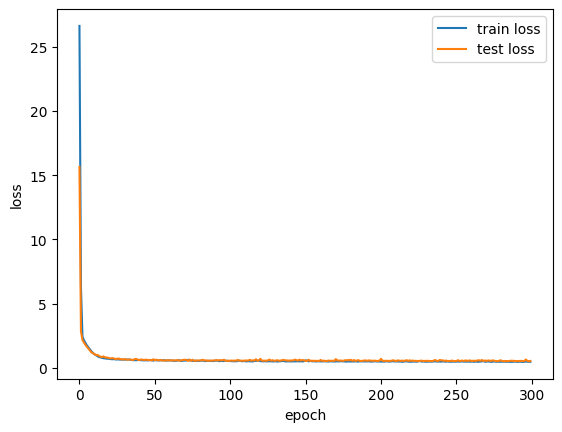

In [10]:
import matplotlib.pyplot as plt
import matplotlib

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss', 'test loss'], loc = 'upper right')

print("Best Accuracy on training set = ", max(history.history['accuracy'])*100)
print("Best Accuracy on test set = ", max(history.history['val_accuracy'])*100)

In [11]:
weights=model.get_weights()
print(weights)
print(len(weights))

[array([[-0.2846419 ,  0.37876824, -0.28692555, -0.31359872, -0.24309273,
        -0.0246023 ,  0.6333806 , -0.11849824],
       [ 0.00560047, -0.6404976 ,  0.32105315, -0.4058125 ,  0.1992143 ,
         0.38429648, -0.04934385, -0.15510191],
       [-0.42434886,  0.24242346,  0.4483026 ,  0.17772423, -0.2572653 ,
         0.23920593, -0.37522268, -0.03793024],
       [ 0.02817398, -0.5188287 , -0.1469149 , -0.03500862,  0.04265615,
        -0.10782306, -0.4127252 ,  0.04428315],
       [-0.04256147,  0.16969809, -0.04044326,  0.4006914 ,  0.34976768,
        -0.01298762, -0.02692665,  0.58199996],
       [-0.6405458 , -0.45693964, -0.405812  ,  0.19557561, -0.25030434,
        -0.24202311, -0.22551037, -0.24523015],
       [ 0.09361638, -0.8649083 , -0.63381135,  0.44861758, -0.3110727 ,
         1.0129491 , -0.25429755, -0.19913131],
       [-0.01642101, -0.3579216 , -0.4427066 ,  0.30775425, -0.12427196,
        -0.24594963,  0.702803  ,  0.23302548]], dtype=float32), array([-0.2150

In [13]:
print(weights[0].shape)
print(weights[1].shape)
print(weights[2].shape)
print(weights[3].shape)

(8, 8)
(8,)
(8, 1)
(1,)


In [14]:
SEED = 1
EPOCHS = 350
BATCH_SIZE = 5

np.random.seed(SEED)

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation = 'relu', input_dim = 8))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test, y_test))

Epoch 1/350
108/108 [==============================] - 2s 6ms/step - loss: 3.3248 - accuracy: 0.5847 - val_loss: 0.7829 - val_accuracy: 0.6537
Epoch 2/350
108/108 [==============================] - 0s 3ms/step - loss: 1.0323 - accuracy: 0.6276 - val_loss: 0.6237 - val_accuracy: 0.6970
Epoch 3/350
108/108 [==============================] - 0s 2ms/step - loss: 0.9531 - accuracy: 0.5978 - val_loss: 0.6420 - val_accuracy: 0.6537
Epoch 4/350
108/108 [==============================] - 0s 3ms/step - loss: 0.8325 - accuracy: 0.6145 - val_loss: 0.7465 - val_accuracy: 0.6061
Epoch 5/350
108/108 [==============================] - 0s 3ms/step - loss: 0.7889 - accuracy: 0.6462 - val_loss: 0.6355 - val_accuracy: 0.6883
Epoch 6/350
108/108 [==============================] - 0s 3ms/step - loss: 0.7105 - accuracy: 0.6518 - val_loss: 0.8209 - val_accuracy: 0.4545
Epoch 7/350
108/108 [==============================] - 0s 3ms/step - loss: 0.7142 - accuracy: 0.6443 - val_loss: 0.6781 - val_accuracy: 0.6061

Best Accuracy on training set =  80.0744891166687
Best Accuracy on test set =  76.6233742237091


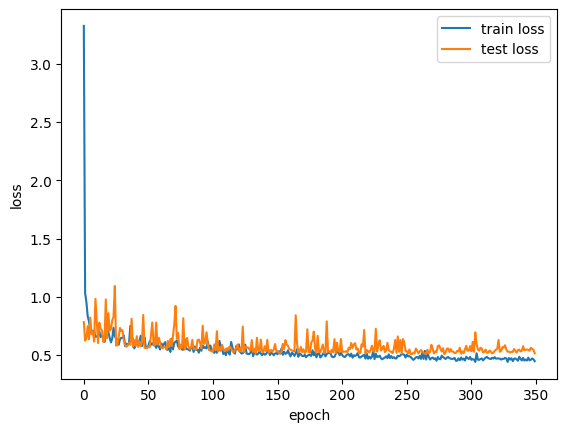

In [17]:
import matplotlib.pyplot as plt
import matplotlib

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss', 'test loss'], loc = 'upper right')

print("Best Accuracy on training set = ", max(history.history['accuracy'])*100)
print("Best Accuracy on test set = ", max(history.history['val_accuracy'])*100)

In [15]:
weights=model.get_weights()
print(weights)
print(len(weights))

[array([[ 0.40562508,  0.09517253,  0.12798524,  0.48349512, -0.10217901,
         0.8068607 ,  0.83316123, -0.11457384,  0.18756312,  0.53204197,
        -0.11846408, -0.06012661, -0.40969294, -0.04371125,  0.6215571 ,
        -0.37348118],
       [-0.34547758,  0.49214748, -0.26661885,  0.24721673,  0.2577077 ,
        -0.32847023, -0.06111434, -0.01885695, -0.12884426, -0.02618658,
         0.34125733, -0.608611  ,  0.31817222,  0.27140084,  0.35271358,
        -0.697776  ],
       [-0.30658317, -0.56805366, -0.20202854,  0.09482431,  0.33570057,
         0.09728559, -0.3597955 ,  0.2659683 , -0.45370287,  0.3160475 ,
        -0.06183229, -0.04860375, -0.1472763 ,  0.1129659 ,  0.21291183,
         0.30020595],
       [ 0.28742898,  0.6834559 , -0.29074734,  0.28761372, -0.03345006,
        -0.40125403, -0.92149585, -0.08470798,  0.6262993 , -0.4486979 ,
        -0.19991365, -0.23570386, -0.57572514,  0.17004298,  0.32010537,
         0.43785936],
       [-0.256724  ,  0.00361602,  

In [16]:
print(weights[0].shape)
print(weights[1].shape)
print(weights[2].shape)
print(weights[3].shape)

(8, 16)
(16,)
(16, 8)
(8,)


In [18]:
SEED = 1
EPOCHS = 400
BATCH_SIZE = 5

np.random.seed(SEED)

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation = 'relu', input_dim = 8))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test, y_test))

Epoch 1/400
108/108 [==============================] - 2s 5ms/step - loss: 3.6268 - accuracy: 0.4246 - val_loss: 1.1450 - val_accuracy: 0.5065
Epoch 2/400
108/108 [==============================] - 0s 3ms/step - loss: 1.1630 - accuracy: 0.5307 - val_loss: 0.8635 - val_accuracy: 0.5671
Epoch 3/400
108/108 [==============================] - 0s 3ms/step - loss: 0.9370 - accuracy: 0.5605 - val_loss: 0.7955 - val_accuracy: 0.5801
Epoch 4/400
108/108 [==============================] - 0s 3ms/step - loss: 0.7277 - accuracy: 0.5885 - val_loss: 0.6888 - val_accuracy: 0.6017
Epoch 5/400
108/108 [==============================] - 0s 4ms/step - loss: 0.6440 - accuracy: 0.6127 - val_loss: 0.6429 - val_accuracy: 0.6450
Epoch 6/400
108/108 [==============================] - 0s 3ms/step - loss: 0.6180 - accuracy: 0.6276 - val_loss: 0.6254 - val_accuracy: 0.6580
Epoch 7/400
108/108 [==============================] - 0s 3ms/step - loss: 0.6167 - accuracy: 0.6294 - val_loss: 0.6316 - val_accuracy: 0.6623

Best Accuracy on training set =  79.32960987091064
Best Accuracy on test set =  72.72727489471436


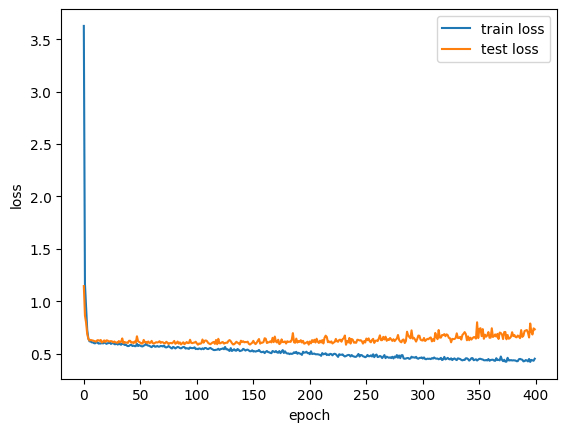

In [19]:
import matplotlib.pyplot as plt
import matplotlib

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss', 'test loss'], loc = 'upper right')

print("Best Accuracy on training set = ", max(history.history['accuracy'])*100)
print("Best Accuracy on test set = ", max(history.history['val_accuracy'])*100)

In [20]:
weights=model.get_weights()
print(weights)
print(len(weights))

[array([[-3.43178920e-02,  1.18242919e+00,  1.26863158e+00,
         3.21189165e-02,  3.76340538e-01,  2.13483255e-02,
         2.94539988e-01,  2.84734428e-01, -5.75918853e-01,
        -1.76829368e-01,  5.59355617e-01, -2.89208025e-01,
        -2.93673337e-01, -7.30418181e-03, -1.35663062e-01,
         1.13513505e+00],
       [ 4.70917344e-01, -8.59955549e-01, -3.81931543e-01,
        -2.94613600e-01,  8.41707662e-02,  1.83850750e-02,
        -5.87002695e-01, -4.98414129e-01, -3.29122961e-01,
         1.10192508e-01,  1.31978452e-01, -1.91900000e-01,
        -2.24132031e-01,  4.78228778e-01, -1.50497347e-01,
        -5.05799472e-01],
       [-5.06686211e-01,  1.93588987e-01, -4.37063307e-01,
        -1.78554058e-01,  2.16912895e-01,  6.16342872e-02,
        -4.76276249e-01, -5.15502453e-01,  2.53180057e-01,
         4.58971858e-01,  2.09341794e-01,  5.42261936e-02,
         5.49327314e-01, -5.54462433e-01, -4.45476055e-01,
        -1.07756106e-03],
       [-4.80555803e-01,  1.80491313

In [21]:
print(weights[0].shape)
print(weights[1].shape)
print(weights[2].shape)
print(weights[3].shape)

(8, 16)
(16,)
(16, 8)
(8,)
